In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In the English Premier League, May - July represents a lull period due to the lack of club football. What makes up for it, is the intense transfer speculation that surrounds all major player transfers today. An important part of negotiations is predicting the fair market price for a player. You are tasked with predicting this Market Value of a player using the data provided below

The attached data set consists of the following attributes:


*  name: Name of the player
*  club: Club of the player
*  age : Age of the player
*  position : The usual position on the pitch
*  position_cat: 1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers
*  market_value : As on transfermrkt.com on July 20th, 2017
*  page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017
*  fpl_value : Value in Fantasy Premier League as on July 20th, 2017
*  fpl_sel : % of FPL players who have selected that player in their team
*  fpl_points : FPL points accumulated over the previous season
*  region: 1 for England, 2 for EU, 3 for Americas, 4 for Rest of World
*  nationality
*  new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)
*  age_cat
*  club_id
*  big_club: Whether one of the Top 6 clubs
*  new_signing: Whether a new signing for 2017/18 (till 20th July)


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Sabudh/Regression/football.csv') # change this path if necessary
df.head(3)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0


# Visualization
***


In [ ]:
data = df.drop(columns=['name','fpl_sel','position','nationality','region','new_foreign']).dropna()
data.head(2)

,club,age,position_cat,market_value,page_views,fpl_value,fpl_points,age_cat,club_id,big_club,new_signing
0,Arsenal,28,1,65.0,4329,12.0,264,4,1,1,0
1,Arsenal,28,1,50.0,4395,9.5,167,4,1,1,0


In [ ]:
print('Shape of Data: ', data.shape)
print('data.describe:')
data.describe()

Shape of Data:  (461, 11)
data.describe:


,age,position_cat,market_value,page_views,fpl_value,fpl_points,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,6.000000,20.000000,1.000000,1.000000


Data Correlation


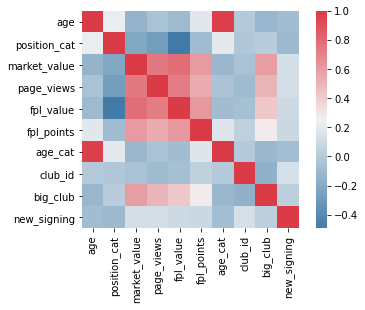

In [ ]:
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)
print('Data Correlation')

Market Value vs Age
The age group of 22 to 29 have the most market value.


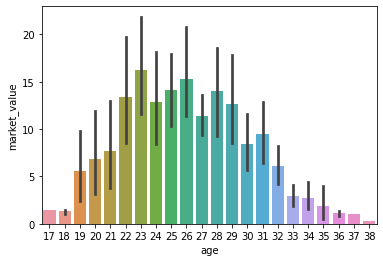

In [ ]:
sns.barplot(data=data, y="market_value", x="age")
print('Market Value vs Age')
print('The age group of 22 to 29 have the most market value.')

Market Value vs Position Cat
The Position Cat 1 has the most market value.


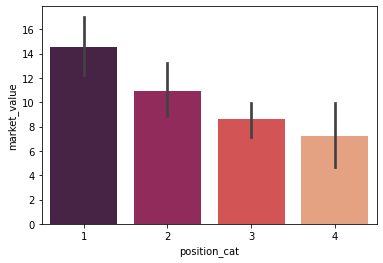

In [ ]:
sns.barplot(data = data, y='market_value', x='position_cat',  palette="rocket")
print('Market Value vs Position Cat')
print('The Position Cat 1 has the most market value.')

Market Value vs Big Club
We see that the market value of players from the top 6 clubs is significantly higher than the other players.


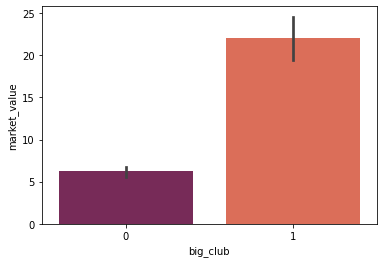

In [ ]:
sns.barplot(data = data, y='market_value', x='big_club', palette="rocket")
print('Market Value vs Big Club')
print('We see that the market value of players from the top 6 clubs is significantly higher than the other players.')

Market Value vs Club


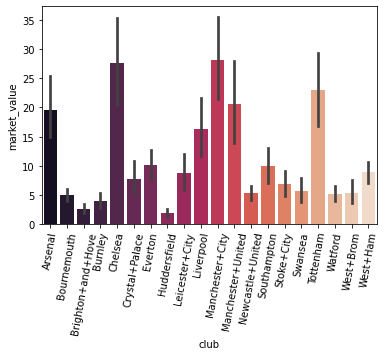

In [ ]:
ax = sns.barplot(data = data, y='market_value', x='club',  palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
print('Market Value vs Club')

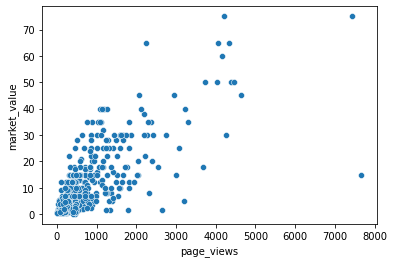

In [ ]:
sns.scatterplot(data=data, x='page_views', y='market_value')

# Split into Train Test 

In [ ]:
output_var = 'market_value'
try:
    data = data.drop(columns=['club'])
except:
    pass
print('Split Train Test data')

Split Train Test data


In [ ]:
import numpy as np
X = data[data.columns[~data.columns.isin([output_var])]]
y = data[[output_var]]

from sklearn.model_selection import train_test_split
np.random.seed(37) # Set seed
x_train, x_test = train_test_split(X, test_size = 0.25)

y_train = y.loc[x_train.index.values] 
y_test = y.loc[x_test.index.values]
x_train = X.loc[x_train.index.values, :]
x_test = X.loc[x_test.index.values, :]
concat_train_data = pd.concat([x_train,y_train],axis=1)

In [ ]:
print('Shape of train data: ',concat_train_data.shape)
concat_train_data.describe()

Shape of train data:  (345, 10)


,age,position_cat,page_views,fpl_value,fpl_points,age_cat,club_id,big_club,new_signing,market_value
count,345.000000,345.000000,345.000000,345.00000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,26.802899,2.191304,758.075362,5.44058,56.011594,3.208696,10.243478,0.313043,0.139130,10.753333
std,3.862686,1.007781,939.588994,1.32894,52.883592,1.244726,5.866625,0.464405,0.346585,11.801618
min,17.000000,1.000000,3.000000,4.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000
25%,24.000000,1.000000,217.000000,4.50000,2.000000,2.000000,5.000000,0.000000,0.000000,3.000000
50%,27.000000,2.000000,456.000000,5.00000,49.000000,3.000000,10.000000,0.000000,0.000000,7.000000
75%,29.000000,3.000000,860.000000,5.50000,93.000000,4.000000,15.000000,1.000000,0.000000,15.000000
max,37.000000,4.000000,7664.000000,12.00000,264.000000,6.000000,20.000000,1.000000,1.000000,75.000000


In [ ]:
concat_train_data.head()

,age,position_cat,page_views,fpl_value,fpl_points,age_cat,club_id,big_club,new_signing,market_value
1,28,1,4395,9.5,167,4,1,1,0,50.0
366,34,3,137,4.0,26,6,16,0,0,1.0
260,24,1,3727,11.5,221,2,12,1,0,50.0
3,28,1,2393,7.5,122,4,1,1,0,20.0
265,29,1,2280,7.0,102,4,12,1,0,30.0


In [ ]:
concat_train_data.corr()['market_value'].sort_values()

position_cat   -0.202518
age            -0.144592
age_cat        -0.116853
club_id        -0.052287
new_signing     0.115376
fpl_points      0.595919
big_club        0.624354
page_views      0.716096
fpl_value       0.771985
market_value    1.000000
Name: market_value, dtype: float64

In [ ]:
print('Shape of test data:',x_test.shape)

Shape of test data: (116, 9)


# Linear Regression

Linear Regression 
****

In [ ]:
from sklearn import linear_model
# Linear regression: Fit and evaluate 
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
coefficients = regr.coef_

predictors = [i for i, item in list(enumerate(coefficients.squeeze())) if abs(item) > 0]

print('Coefficients:', coefficients)
print('Intercept:', regr.intercept_)
print('Predictors with non-zero coefficients:', predictors)

print ('Regression: R^2 score on training set', regr.score(x_train,y_train))
print ('Regression: R^2 score on test set', regr.score(x_test,y_test))

Coefficients: [[-9.13339239e-01  1.49939433e+00  1.72790144e-03  4.31968173e+00
   4.17597233e-02  1.94488984e+00  4.98185359e-02  6.90439553e+00
   6.26580028e-01]]
Intercept: [-4.20206495]
Predictors with non-zero coefficients: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Regression: R^2 score on training set 0.7493225465612373
Regression: R^2 score on test set 0.7729660590753491


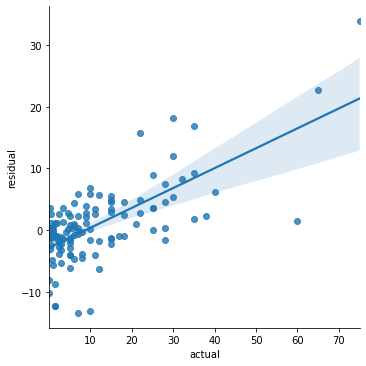

Root Mean Square Error:  6.427582110393847


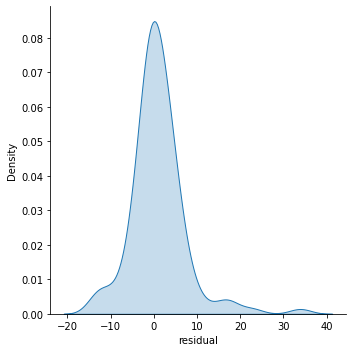

In [ ]:
y_pred = regr.predict(x_test)
preds = y_pred.reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [ ]:
pred = regr.predict(x_test)
# index at which we want to see the values
idx = 30
#comparing Actual & Predicted Values
print("Actual Value: {} Predicted Value: {} at index {}".format(np.array(y_test)[idx],pred[idx], idx))
print('You will observe that the predicted value will improve as we use more complex models.')

Actual Value: [5.] Predicted Value: [9.07703591] at index 30
You will observe that the predicted value will improve as we use more complex models.


Lasso Regression
***

In [ ]:
from sklearn.linear_model import Lasso as Lasso_Reg
# Lasso regression: Fit and evaluate 
reg = Lasso_Reg(alpha = 0.01)
reg.fit(x_train,y_train)
coefficients = reg.coef_

print('Lasso:')
print('Coefficients:', coefficients)
print('Intercept:', reg.intercept_)
print('Predictors with non-zero coefficients:', [i for i, item in enumerate(coefficients) if abs(item) > 0])

print ('Lasso Regression: R^2 score on training set', reg.score(x_train,y_train))
print ('Lasso Regression: R^2 score on test set', reg.score(x_test,y_test))

Lasso:
Coefficients: [-8.69706203e-01  1.47952962e+00  1.75740784e-03  4.29830793e+00
  4.19460849e-02  1.80182572e+00  4.96905494e-02  6.85402124e+00
  5.37075504e-01]
Intercept: [-4.75596544]
Predictors with non-zero coefficients: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Lasso Regression: R^2 score on training set 0.7492960616429999
Lasso Regression: R^2 score on test set 0.7736816779419766


In [ ]:
pred = reg.predict(x_test)
#comparing Actual & Predicted Values
print("Actual Value: {} Predicted Value: {} at index {}".format(np.array(y_test)[idx],pred[idx], idx))

Actual Value: [5.] Predicted Value: 9.08798462088471 at index 30


Ridge_Regression
***

In [ ]:
from sklearn.linear_model import Ridge as Ridge_Reg
# Ridge regression: Fit and evaluate 
reg = Ridge_Reg(alpha = 0.1)
reg.fit(x_train, y_train)
coefficients = reg.coef_

predictors = [i for i, item in list(enumerate(coefficients.squeeze())) if abs(item) > 0]

print ('Ridge:')
print ('Coefficients:', coefficients)
print ('Selected predictors:',predictors)
print ('Ridge Regression: R^2 score on training set', reg.score(x_train,y_train))
print ('Ridge Regression: R^2 score on test set', reg.score(x_test,y_test))

Ridge:
Coefficients: [[-9.11662331e-01  1.49948033e+00  1.73235620e-03  4.31831761e+00
   4.17742298e-02  1.93838632e+00  4.97374346e-02  6.89124859e+00
   6.24837983e-01]]
Selected predictors: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Ridge Regression: R^2 score on training set 0.749322313658561
Ridge Regression: R^2 score on test set 0.7730768220953186


In [ ]:
pred = reg.predict(x_test)
#comparing Actual & Predicted Values
print("Actual Value: {} Predicted Value: {} at index {}".format(np.array(y_test)[idx],pred[idx], idx))

Actual Value: [5.] Predicted Value: [9.08099865] at index 30


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0,max_depth=5)  
  
# fit the regressor with X and Y data 
regressor.fit(x_train, y_train)
print ('DT Regression: R^2 score on test set', regressor.score(x_test,y_test))
print ('DT Regression: R^2 score on training set', regressor.score(x_train,y_train))

DT Regression: R^2 score on test set 0.6564588059813419
DT Regression: R^2 score on training set 0.84645394947969


In [ ]:
y_pred = regressor.predict(x_test) 
print(y_pred.reshape(len(y_pred),1).shape,y_test.shape)
preds = y_pred.reshape(len(y_pred),1)
preds.shape
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])

(116, 1) (116, 1)


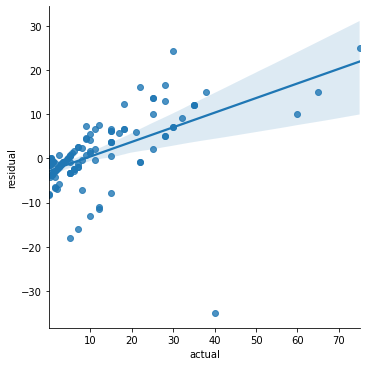

Root Mean Square Error:  7.906634257237495


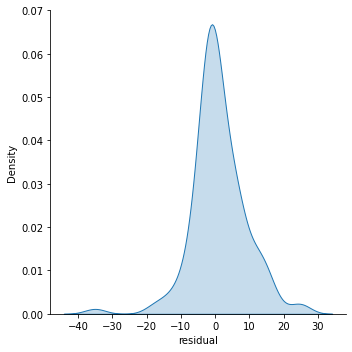

In [ ]:
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [ ]:
#comparing Actual & Predicted Values
print("Actual Value: {} Predicted Value: {} at index {}".format(np.array(y_test)[idx],y_pred[idx], idx))

Actual Value: [5.] Predicted Value: 4.358208955223881 at index 30


# Ensemble


Random Forest Regression
***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# create a regressor object
regr = RandomForestRegressor(max_depth=5, random_state=0)
# fit the regressor with X and Y data
regr.fit(x_train, y_train)
regr.feature_importances_
regr.estimators_[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=209652396, splitter='best')

In [ ]:
print ('RF Regression: R^2 score on test set', regr.score(x_test,y_test))
print ('RF Regression: R^2 score on training set', regr.score(x_train,y_train))

RF Regression: R^2 score on test set 0.7800657202105491
RF Regression: R^2 score on training set 0.8880173321760527


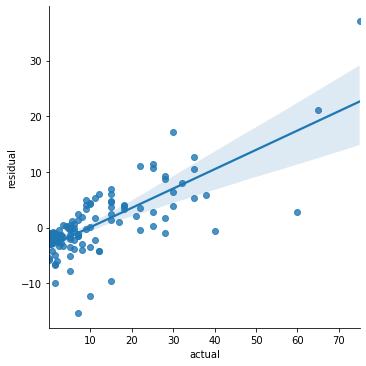

Root Mean Square Error:  6.326284258231286


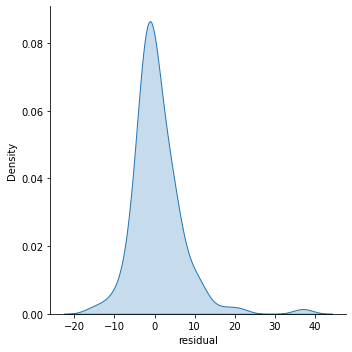

In [ ]:
y_pred = regr.predict(x_test)
preds = y_pred.reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [ ]:
#comparing Actual & Predicted Values
print("Actual Value: {} Predicted Value: {} at index {}".format(np.array(y_test)[idx],y_pred[idx], idx))

Actual Value: [5.] Predicted Value: 4.553620064444037 at index 30


Gradient Boosting Regression
***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# create a regressor object
reg = GradientBoostingRegressor(random_state=0,min_samples_split=4)
# fit the regressor with X and Y data
reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print ('GB Regression: R^2 score on test set', reg.score(x_test,y_test))
print ('GB Regression: R^2 score on training set', reg.score(x_train,y_train))

GB Regression: R^2 score on test set 0.8265247186121873
GB Regression: R^2 score on training set 0.9556677901976248


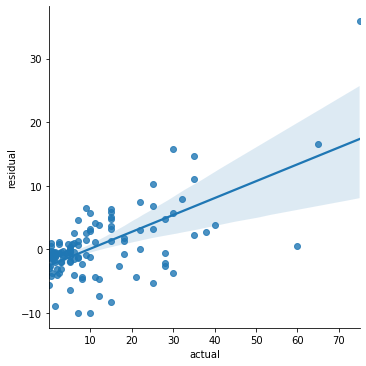

Root Mean Square Error:  5.618508467615689


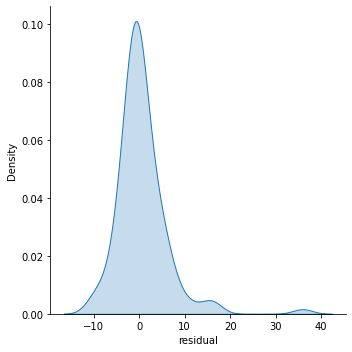

In [ ]:
y_pred = reg.predict(x_test)
preds = y_pred.reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [ ]:
#comparing Actual & Predicted Values
print("Actual Value: {} Predicted Value: {} at index {}".format(np.array(y_test)[idx],y_pred[idx], idx))

Actual Value: [5.] Predicted Value: 4.962916020508112 at index 30


# SV Regression

In [ ]:
from sklearn.svm import SVR
# create a regressor object
regr = SVR(C=10000.0, epsilon=0.001,kernel='poly',degree=3)
# fit the regressor with X and Y data
regr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001,
    gamma='scale', kernel='poly', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print ('SV Regression: R^2 score on test set', reg.score(x_test,y_test))
print ('SV Regression: R^2 score on training set', reg.score(x_train,y_train))

SV Regression: R^2 score on test set 0.8265247186121873
SV Regression: R^2 score on training set 0.9556677901976248


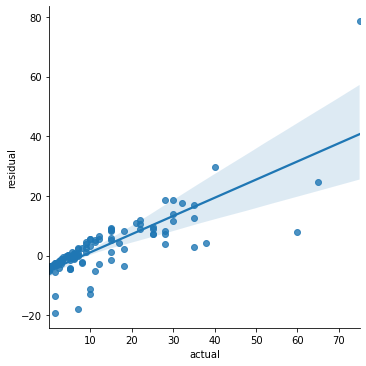

Root Mean Square Error:  10.498599993548536


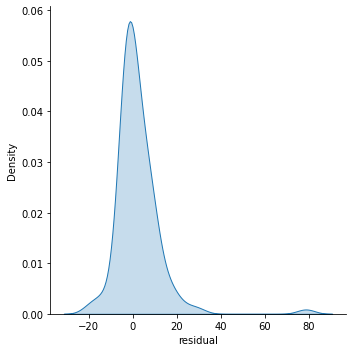

In [ ]:
y_pred = regr.predict(x_test)
preds = y_pred.reshape(len(y_pred),1)
residual_df = pd.DataFrame(np.concatenate([y_test,preds,y_test-preds],axis = 1),columns=['actual','predicted','residual'])
sns.lmplot(x='actual',y='residual',data=residual_df)
plt.show()
print("Root Mean Square Error: ",np.sqrt(1/residual_df.shape[0]*(residual_df.residual).dot(residual_df.residual)))
sns.displot(residual_df, x="residual", kind="kde", fill=True)

In [ ]:
#comparing Actual & Predicted Values
print("Actual Value: {} Predicted Value: {} at index {}".format(np.array(y_test)[idx],y_pred[idx], idx))

Actual Value: [5.] Predicted Value: 5.2780675326758315 at index 30
